In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import seaborn.apionly as sns
import pandas as pd
%matplotlib inline

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('results/test_chain_gpufull.csv')
df_accept = pd.read_csv('results/test_accept_gpufull.csv')
df.head()

,logz,logdust,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,logSFH6,lnprob,N_walkers
0,-1.9758,-5.9419,-4.977,-8.5716,-6.9603,-8.445,-3.5902,-8.4559,-5.522,-1.037577e+06,20
1,-1.9758,-5.9419,-4.977,-8.5716,-6.9603,-8.445,-3.5902,-8.4559,-5.522,-1.037577e+06,20
2,-1.9758,-5.9419,-4.977,-8.5716,-6.9603,-8.445,-3.5902,-8.4559,-5.522,-1.037577e+06,20
3,-1.9758,-5.9419,-4.977,-8.5716,-6.9603,-8.445,-3.5902,-8.4559,-5.522,-1.037577e+06,20
4,-1.9758,-5.9419,-4.977,-8.5716,-6.9603,-8.445,-3.5902,-8.4559,-5.522,-1.037577e+06,20


In [13]:
logSFH = df[['logSFH0', 'logSFH1', 'logSFH2', 'logSFH3', 'logSFH4', 'logSFH5', 'logSFH6']].values

In [16]:
logNpix = np.log10(np.sum(10.**logSFH, axis=1))

In [18]:
df['logNpix'] = logNpix

In [40]:
params = df.columns
params = params.delete(-2)

In [42]:
N_walkers = df['N_walkers'][0]
N_steps = len(df) / N_walkers
N_params = len(params) 

In [43]:
flatchains = df[params].values
chains = flatchains.reshape((N_walkers, N_steps, N_params))

In [44]:
walkers = np.arange(N_walkers)
steps = np.arange(N_steps)

In [47]:
SFH = np.log10(1e2 / 7.)
truths = np.array([-0.2, -2., SFH, SFH, SFH, SFH, SFH, SFH, SFH, -np.inf, 2.])

(0, 6)

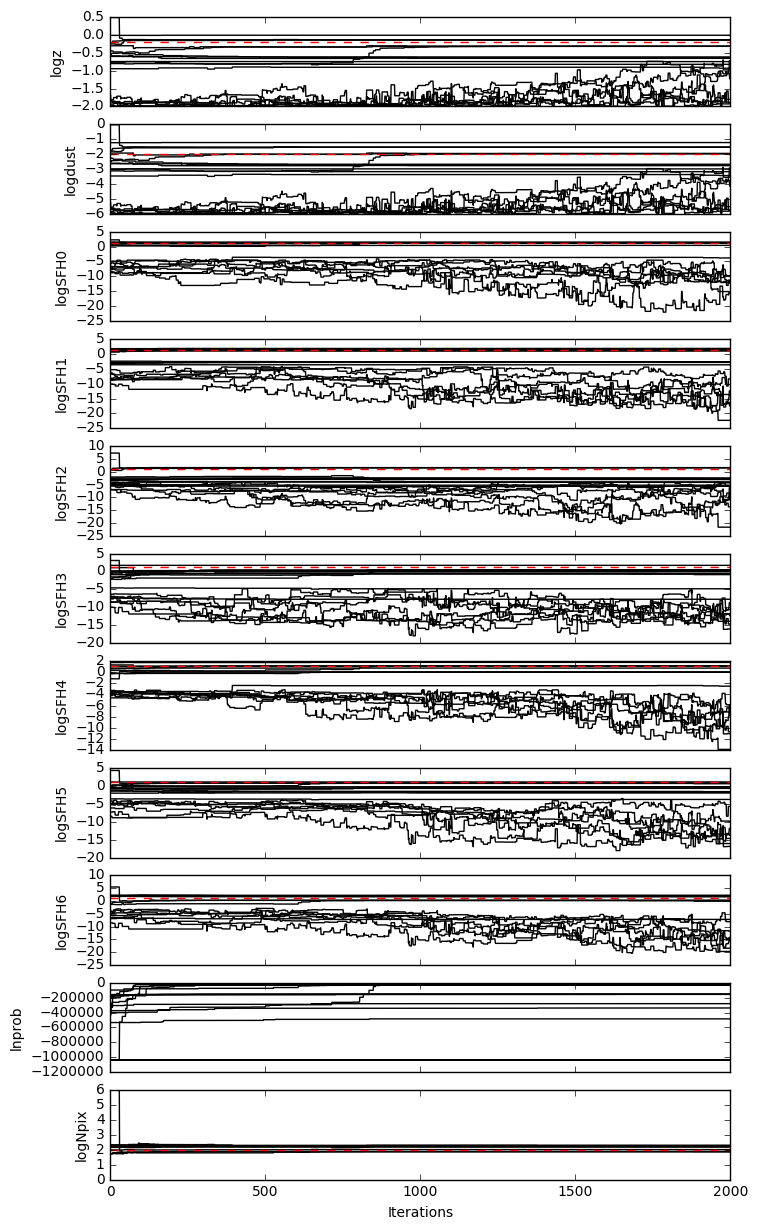

In [49]:
fig, axes = plt.subplots(nrows=N_params, figsize=(8, 15), sharex=True)
for d in np.arange(N_params):    
    for w in walkers:
        axes[d].plot(steps, chains[w,:,d], 'k-')
    axes[d].axhline(y=truths[d], ls='--', color='r')
    axes[d].set_ylabel(params[d])
axes[-1].set_xlabel('Iterations')
axes[-1].set_ylim([0, 6])

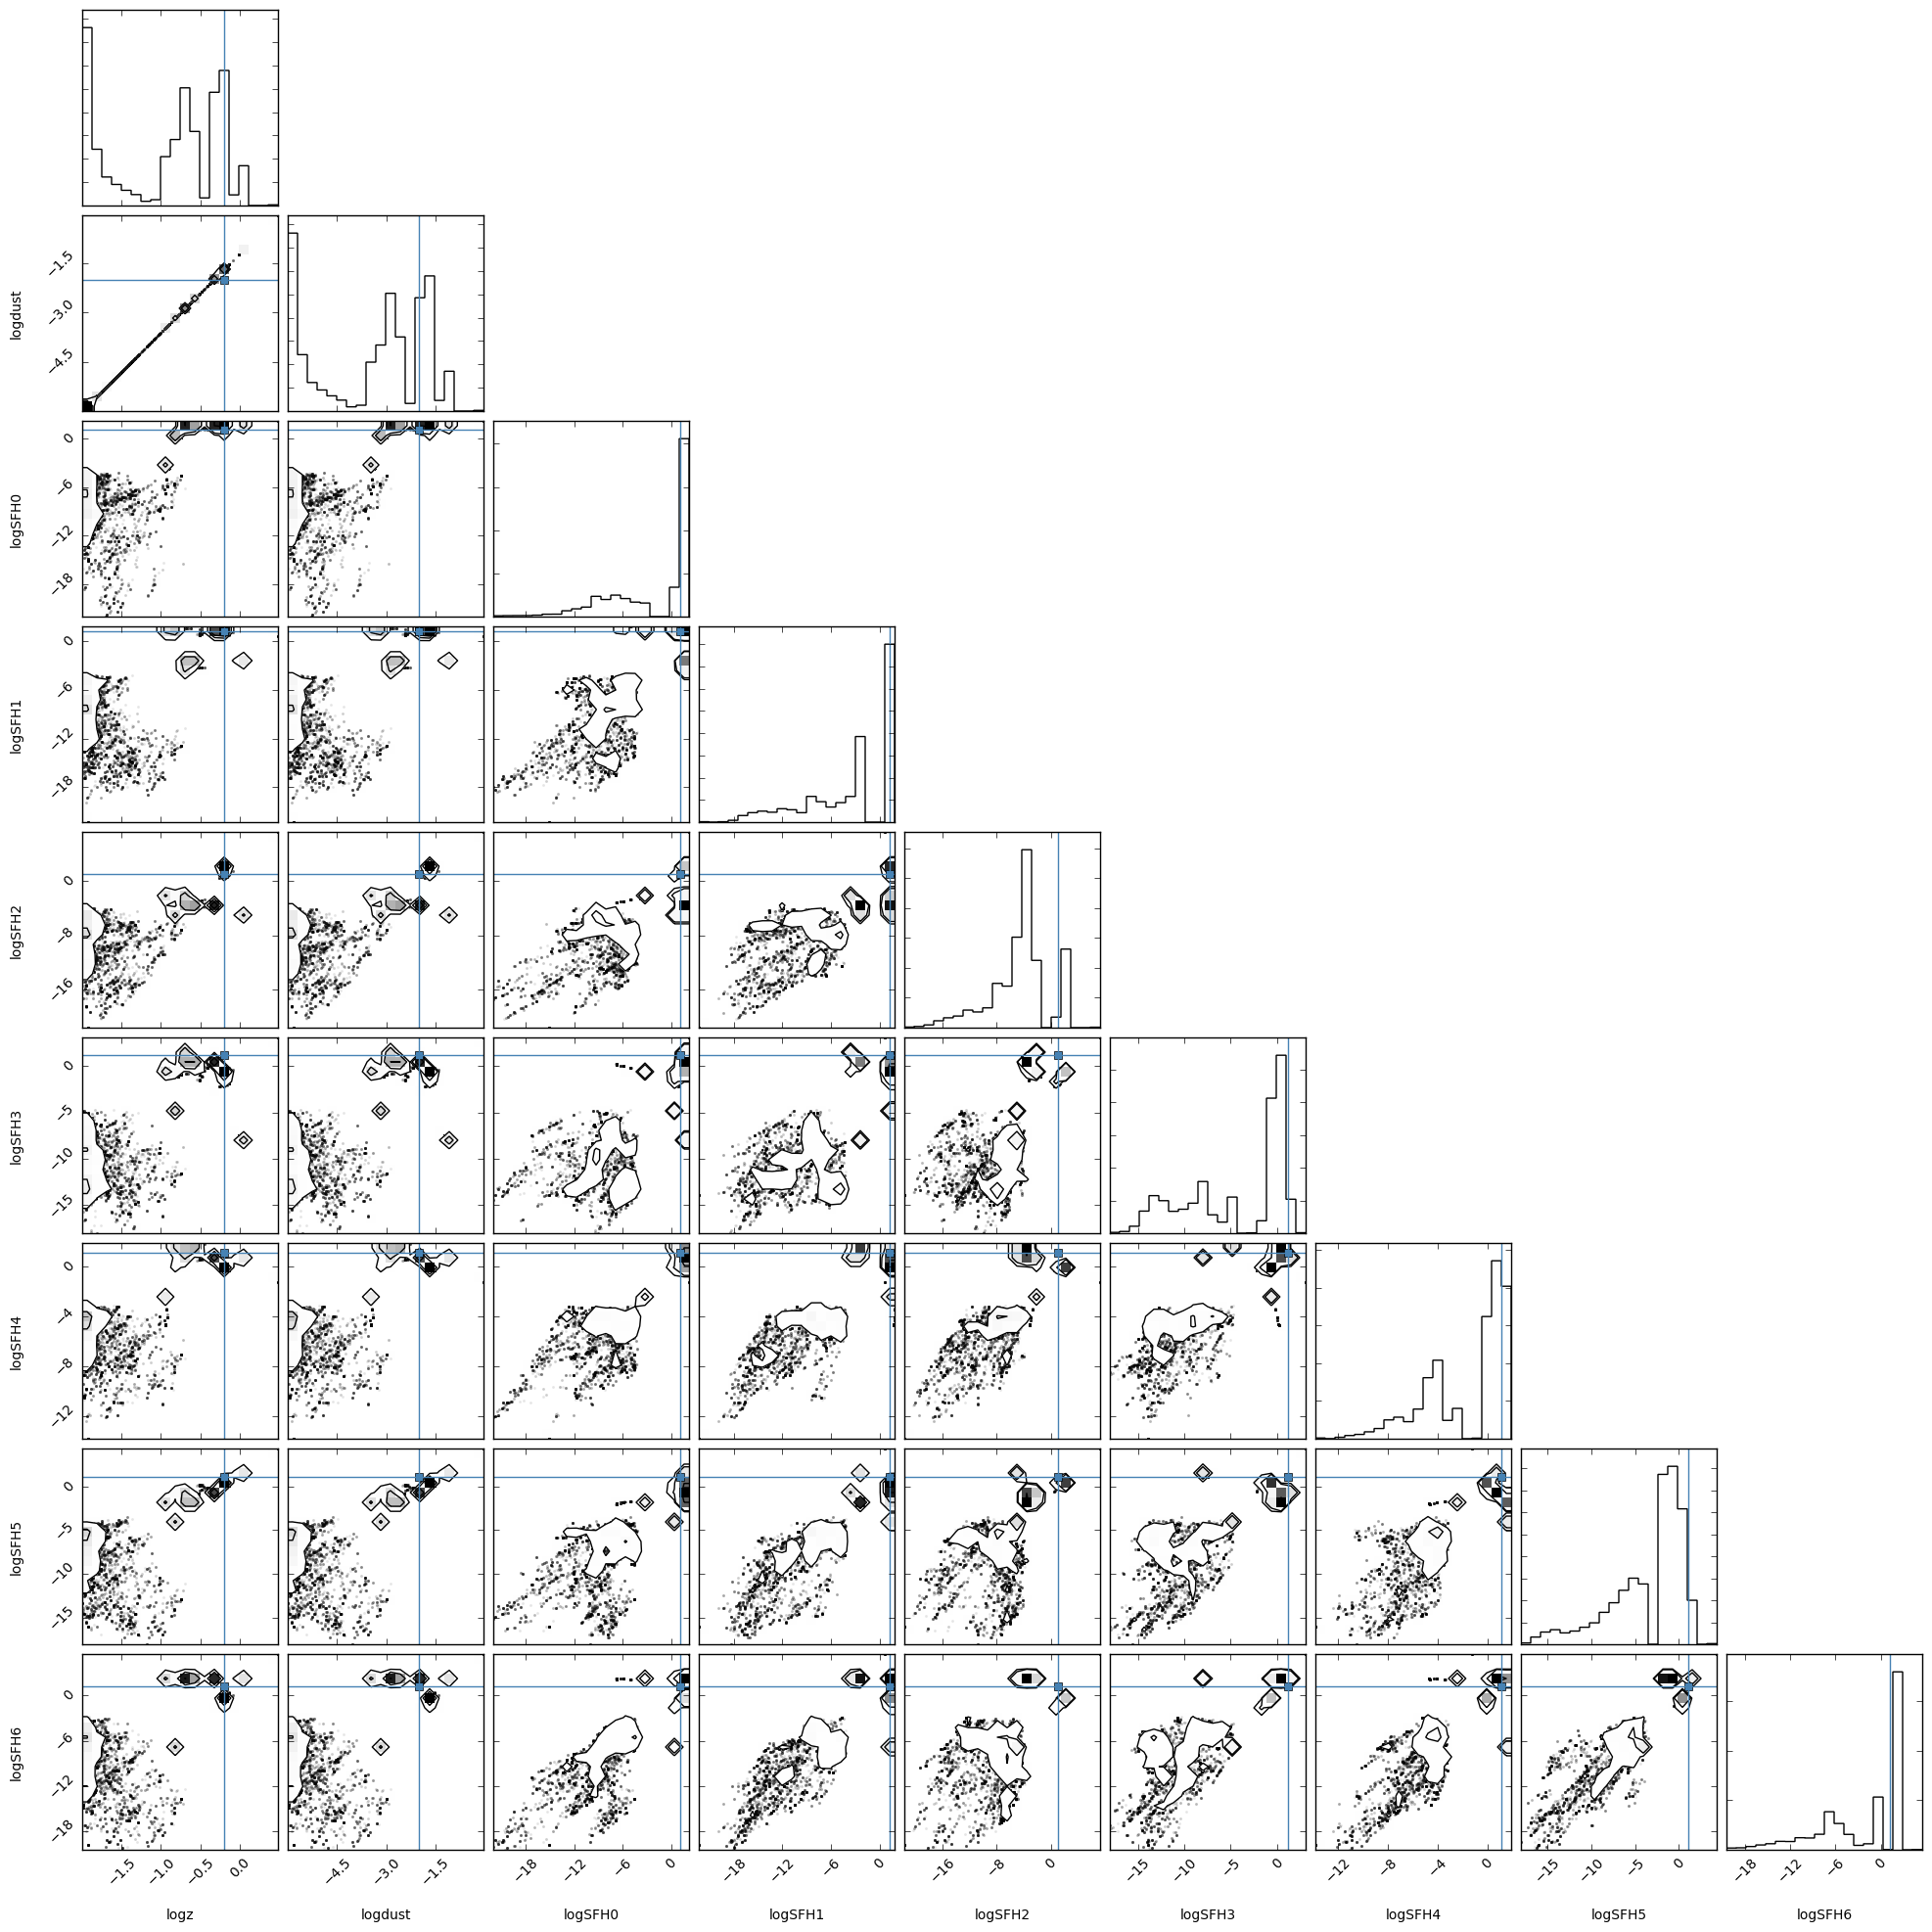

In [10]:
a = corner.corner(df[params], labels=params, truths=truths)